<a href="https://colab.research.google.com/github/AIKevin/machine_learning_with_python/blob/master/practical_work3_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression
##PW3
###Sci-Kit Learn

##Table of Contents


1.   Installing Dependencies
2.   Data Loading, Preprocessing and Visualisization
3.   Simple Linear Regression
4.   Multiple Linear Regression


## 1.Installing dependencies

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##2.Data Loading, Preprocessing and Visualization

###Downloading boston dataset
We download it on a public Github

In [2]:
!git clone https://github.com/shivang98/Social-Network-ads-Boost

Cloning into 'Social-Network-ads-Boost'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.


We check the file is here

In [3]:
%%shell
cd Social-Network-ads-Boost
ls

random_forest_classification.py  README.md  Social_Network_Ads.csv


In [0]:
dataset= pd.read_csv("Social-Network-ads-Boost/Social_Network_Ads.csv")

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


###Scatterplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fe9c0ea58>,
      dtype=object)

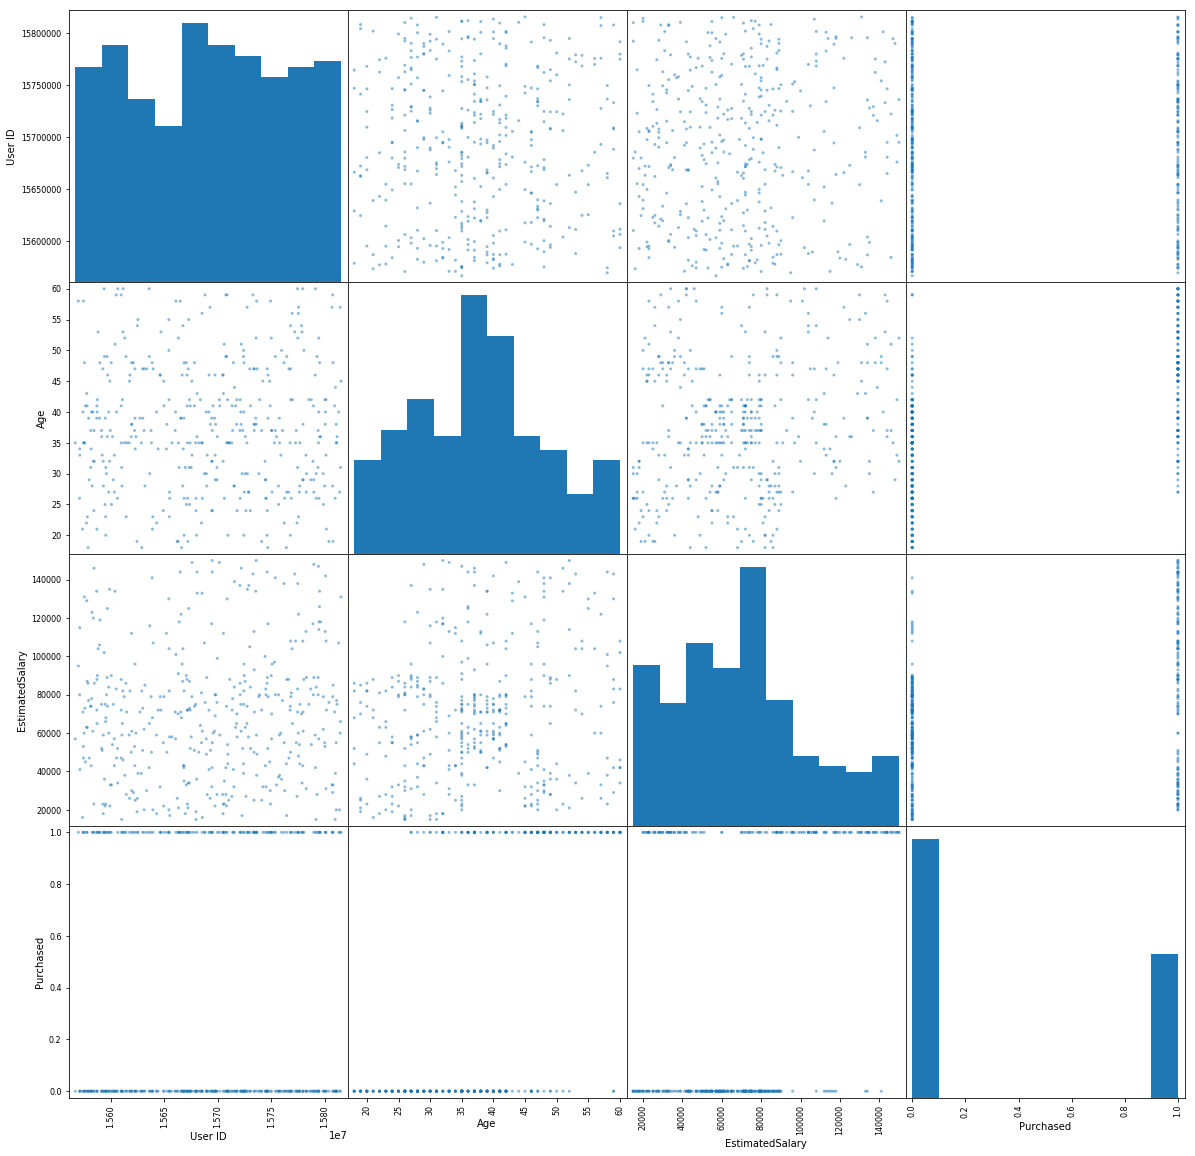

In [6]:
pd.plotting.scatter_matrix(dataset, figsize=(20, 20))

In [7]:
print(dataset.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


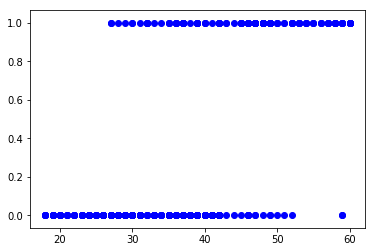

In [8]:
plt.scatter(dataset["Age"],dataset["Purchased"], color="blue")

###Boxplot

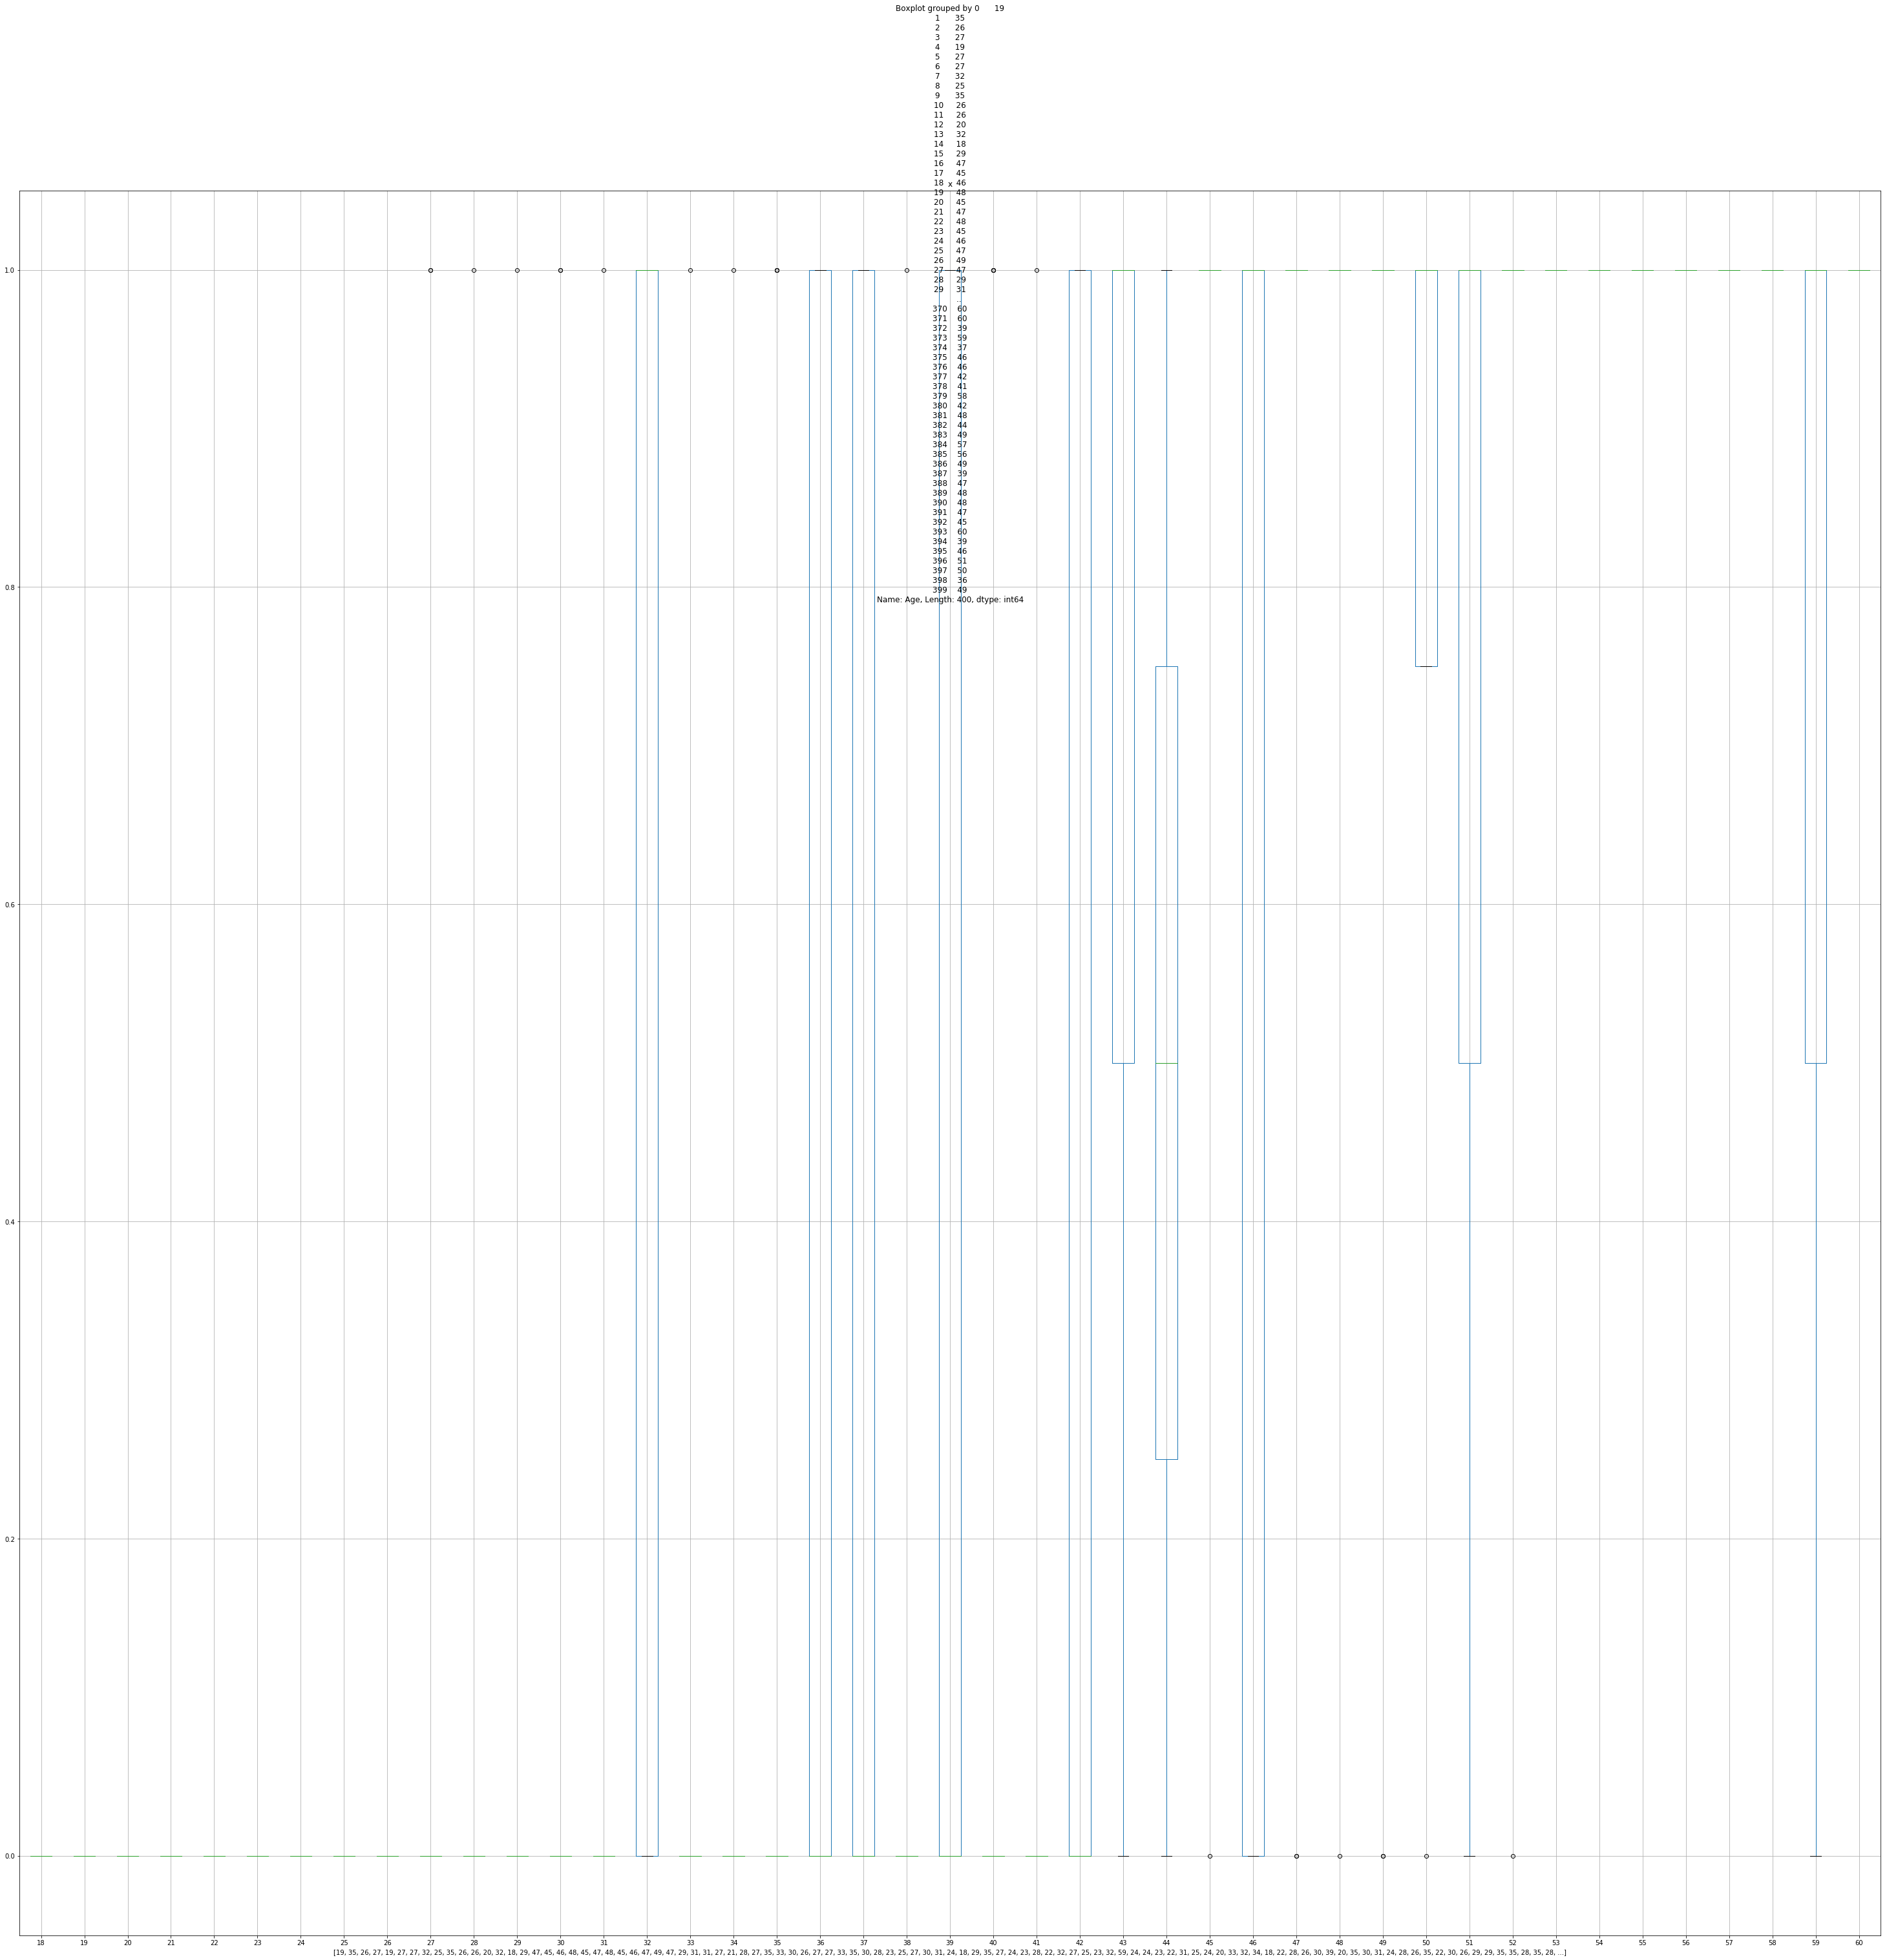

In [9]:
pd.DataFrame.boxplot(  dataset["Purchased"], by=dataset["Age"],figsize=[50,50])

In [10]:
X = np.asarray(dataset[[ 'Age', 'EstimatedSalary']])
y=np.asarray(dataset["Purchased"])
print(X[0:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


###Scaling the data

In [0]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [12]:
print(X)

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

### Data Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


##Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [15]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [16]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.6308339 , 0.3691661 ],
       [0.65396405, 0.34603595],
       [0.67054985, 0.32945015],
       [0.59162418, 0.40837582],
       [0.64657917, 0.35342083],
       [0.40844433, 0.59155567],
       [0.41778098, 0.58221902],
       [0.26243229, 0.73756771],
       [0.38041539, 0.61958461],
       [0.58966129, 0.41033871],
       [0.57386015, 0.42613985],
       [0.70683501, 0.29316499],
       [0.68298024, 0.31701976],
       [0.53537132, 0.46462868],
       [0.55349142, 0.44650858],
       [0.65125255, 0.34874745],
       [0.72022093, 0.27977907],
       [0.77659602, 0.22340398],
       [0.73491826, 0.26508174],
       [0.78784487, 0.21215513],
       [0.60747925, 0.39252075],
       [0.68787653, 0.31212347],
       [0.74952483, 0.25047517],
       [0.27292571, 0.72707429],
       [0.51107349, 0.48892651],
       [0.24053172, 0.75946828],
       [0.63160045, 0.36839955],
       [0.52337307, 0.47662693],
       [0.81405043, 0.18594957],
       [0.58612644, 0.41387356],
       [0.

## Confusion Matrix

[[22  8]
 [ 5 65]]
Confusion matrix, without normalization
[[22  8]
 [ 5 65]]


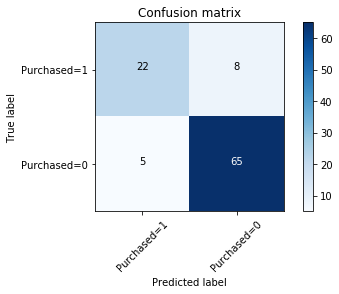

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Purchased=1','Purchased=0'],normalize= False,  title='Confusion matrix')

##AIC

In [18]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2, init_params='kmeans')
model.fit(X)
print(model.aic(X))

2251.9384080888294


## Model Comparison

In [19]:
X2 = np.asarray(dataset[[ 'Age']])
y=np.asarray(dataset["Purchased"])
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, y, test_size=0.25, random_state=4)
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train2,y_train2)
model = GaussianMixture(n_components=2, init_params='kmeans')
model.fit(X2)
print(model.aic(X2))

1131.4209035618155


This model has an AIC lower than our first model, therefore the first model is better. Let's go back to the first model.

## First Model: Performance Evaluation

In [20]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.81      0.73      0.77        30

    accuracy                           0.87       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.87      0.87      0.87       100



## ROC Curve Plot

In [21]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test, yhat)

(array([0.  , 0.07, 1.  ]), array([0.  , 0.73, 1.  ]), array([2, 1, 0]))

### Method 1

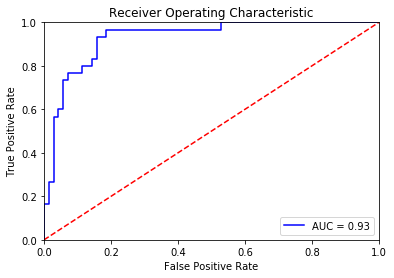

In [22]:

# calculate the fpr and tpr for all thresholds of the classification
probs = yhat_prob
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Method 2

In [23]:
!pip install plotnine 

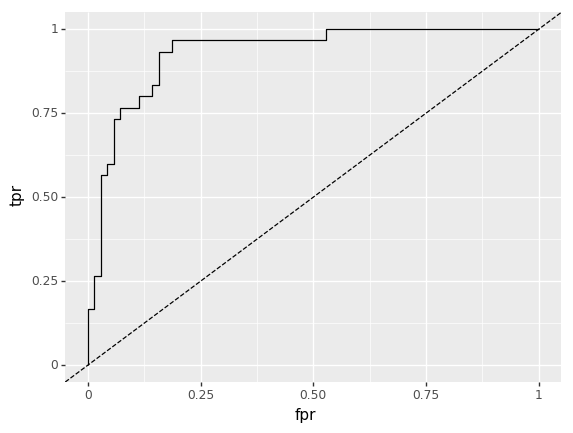

<ggplot: (8744498825764)>

In [24]:

# method II: ggplot
from plotnine import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed') + xlim(0,1) +ylim(0,1)
